<a href="https://colab.research.google.com/github/naguzmans/opportunistic-atm/blob/main/opensky_api.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install PyOpenSky

In [ ]:
!pip install pyopensky --upgrade
!mv secret.conf /root/.config/pyopensky/

Perform Query

In [36]:
from pyopensky import OpenskyImpalaWrapper

opensky = OpenskyImpalaWrapper()

os_query = opensky.rawquery(
    'SELECT * FROM state_vectors_data4 \
    WHERE lat >= 51.848578 AND lat <= 51.905650 \
    AND lon >= -0.418809 AND lon <= -0.326079 \
    AND hour >= 1650628800 AND hour <= 1650632400 \
    AND geoaltitude >= 0 AND geoaltitude <= 1000;'
)

* Server connection successful!
* Fetching records...
Sending query request: [SELECT * FROM state_vectors_data4     WHERE lat >= 51.848578 AND lat <= 51.905650     AND lon >= -0.418809 AND lon <= -0.326079     AND hour >= 1650628800 AND hour <= 1650632400     AND geoaltitude >= 0 AND geoaltitude <= 1000;]
Processing query result.
* Records downloaded.


<Figure size 432x288 with 0 Axes>

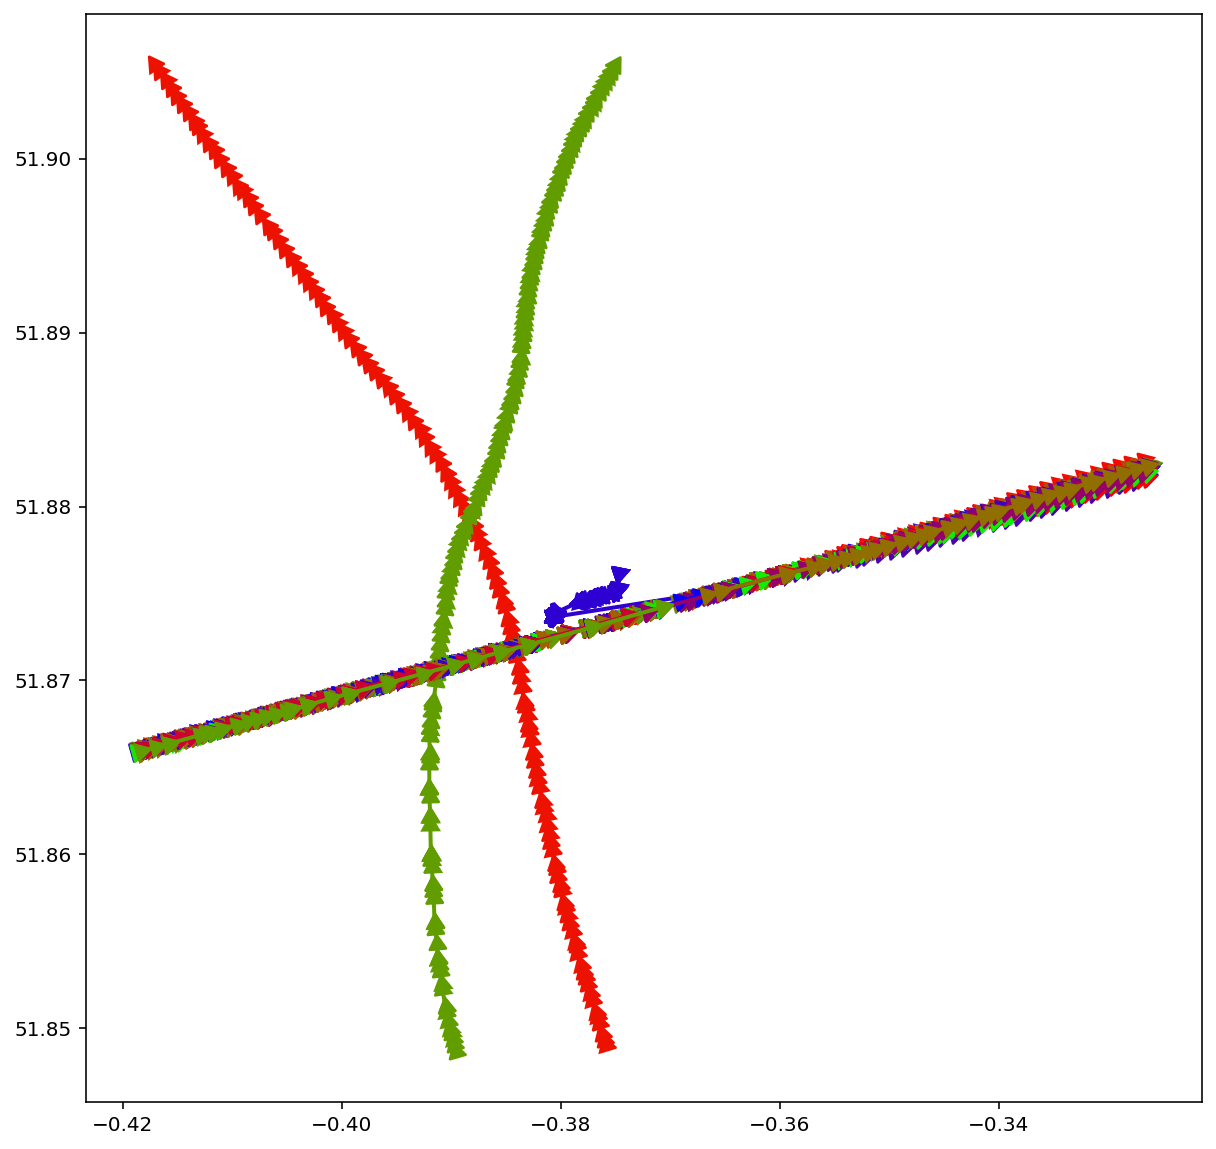

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import random
%config InlineBackend.figure_format = 'retina'

unique_callsigns = pd.unique(os_query['callsign'])

plt.figure()
fig, ax = plt.subplots(figsize=(10,10))
number_of_colors = 100
cmap = plt.cm.get_cmap('brg', number_of_colors)

for callsign in unique_callsigns:
  flight = os_query[os_query['callsign'] == callsign].reset_index(drop=True)

  color_index = random.randint(0,number_of_colors)
  ax.plot(flight['lon'],flight['lat'], '-', linewidth=2, color = cmap(color_index))

  for j in range(0, len(flight)):
    ax.plot(flight['lon'][j],flight['lat'][j], '-', marker=(3, 0, -flight['heading'][j]), markersize=10, color = cmap(color_index))


In [33]:
flight

,time,icao24,lat,lon,velocity,heading,vertrate,callsign,onground,alert,spi,squawk,baroaltitude,geoaltitude,lastposupdate,lastcontact,hour
1451,1650628890,40772d,51.865997,-0.418371,57.168132,74.337894,-3.25120,EZY78WL,False,False,False,7444.0,358.14,358.14,1.650629e+09,1.650629e+09,1650628800
1452,1650628891,40772d,51.866135,-0.417629,57.663642,74.475889,-3.25120,EZY78WL,False,False,False,7444.0,350.52,350.52,1.650629e+09,1.650629e+09,1650628800
1453,1650628892,40772d,51.866272,-0.416887,57.663642,74.475889,-2.92608,EZY78WL,False,False,False,7444.0,350.52,350.52,1.650629e+09,1.650629e+09,1650628800
1454,1650628893,40772d,51.866409,-0.416031,57.663642,74.475889,-2.92608,EZY78WL,False,False,False,7444.0,350.52,350.52,1.650629e+09,1.650629e+09,1650628800
1455,1650628894,40772d,51.866548,-0.415268,58.298105,74.124053,-2.60096,EZY78WL,False,False,False,7444.0,342.90,342.90,1.650629e+09,1.650629e+09,1650628800
1456,1650628895,40772d,51.866638,-0.414808,58.298105,74.124053,-2.60096,EZY78WL,False,False,False,7444.0,342.90,342.90,1.650629e+09,1.650629e+09,1650628800
1457,1650628896,40772d,51.866638,-0.414808,58.793095,74.261199,-2.92608,EZY78WL,False,False,False,7444.0,342.90,342.90,1.650629e+09,1.650629e+09,1650628800
1458,1650628897,40772d,51.866959,-0.412804,58.793095,74.261199,-2.60096,EZY78WL,False,False,False,7444.0,335.28,335.28,1.650629e+09,1.650629e+09,1650628800
1459,1650628898,40772d,51.867096,-0.411987,58.793095,74.261199,-2.60096,EZY78WL,False,False,False,7444.0,335.28,335.28,1.650629e+09,1.650629e+09,1650628800
1460,1650628899,40772d,51.867246,-0.411148,58.793095,74.261199,-2.27584,EZY78WL,False,False,False,7444.0,335.28,335.28,1.650629e+09,1.650629e+09,1650628800


In [24]:
df

,time,icao24,lat,lon,velocity,heading,vertrate,callsign,onground,alert,spi,squawk,baroaltitude,geoaltitude,lastposupdate,lastcontact,hour
304,1650628890,40772d,51.865997,-0.418371,57.168132,74.337894,-3.25120,EZY78WL,False,False,False,7444.0,358.14,358.14,1.650629e+09,1.650629e+09,1650628800
305,1650628891,40772d,51.866135,-0.417629,57.663642,74.475889,-3.25120,EZY78WL,False,False,False,7444.0,350.52,350.52,1.650629e+09,1.650629e+09,1650628800
306,1650628892,40772d,51.866272,-0.416887,57.663642,74.475889,-2.92608,EZY78WL,False,False,False,7444.0,350.52,350.52,1.650629e+09,1.650629e+09,1650628800
307,1650628893,40772d,51.866409,-0.416031,57.663642,74.475889,-2.92608,EZY78WL,False,False,False,7444.0,350.52,350.52,1.650629e+09,1.650629e+09,1650628800
308,1650628894,40772d,51.866548,-0.415268,58.298105,74.124053,-2.60096,EZY78WL,False,False,False,7444.0,342.90,342.90,1.650629e+09,1.650629e+09,1650628800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2198,1650635995,459cd3,51.874237,-0.370937,64.163356,74.180806,2.27584,MMD6987,False,False,False,NaN,213.36,220.98,1.650636e+09,1.650636e+09,1650632400
2199,1650635996,459cd3,51.874237,-0.370937,64.163356,74.180806,2.27584,MMD6987,False,False,False,NaN,213.36,220.98,1.650636e+09,1.650636e+09,1650632400
2200,1650635997,459cd3,51.874557,-0.369081,68.050655,73.757121,10.40384,MMD6987,False,False,False,NaN,228.60,228.60,1.650636e+09,1.650636e+09,1650632400
2201,1650635998,459cd3,51.874881,-0.367279,68.544716,73.877401,12.35456,MMD6987,False,False,False,NaN,251.46,236.22,1.650636e+09,1.650636e+09,1650632400
